<a href="https://colab.research.google.com/github/Nourhan-Hegazy/Cairo_Cyclist_Route_Planner/blob/main/Bachelor_test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [92]:
df = pd.read_csv('/content/dataset.csv')
df.head()

,Unnamed: 0,length,highway,shadow,thermal comfort area/buffer,green_500,uv_cost,traffic_delay,traffic,green,...,gradient,elevation_cost,poll_cost,# of intersections /node,intersection,intersection_cost,ux,uy,vx,vy
0,0,21.861,footway,0.0,0.934335,0.115940,0.0,0,0.0,0.15,...,-0.003549,0.0000,7.43274,3,0,0.000000,31.347326,30.062128,31.347301,30.062324
1,1,11.621,service,0.0,0.994981,0.117201,0.0,0,0.0,0.15,...,0.045006,6.9726,7.90228,3,0,0.000000,31.347326,30.062128,31.347445,30.062131
2,2,29.497,footway,0.0,0.851233,0.116419,0.0,0,0.0,0.15,...,-0.002123,0.0000,10.02898,3,0,0.000000,31.347301,30.062324,31.347277,30.062498
3,3,36.238,footway,0.0,0.690106,0.116226,0.0,0,0.0,0.15,...,-0.014569,0.0000,12.32092,3,0,0.000000,31.347277,30.062498,31.347232,30.062821
4,4,34.347,footway,0.0,0.612912,0.117401,0.0,0,0.0,0.15,...,0.019734,6.8694,17.51697,4,1,32.098552,31.347232,30.062821,31.347586,30.062863


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   87 non-null     int64  
 1   length                       87 non-null     float64
 2   highway                      87 non-null     object 
 3   shadow                       87 non-null     float64
 4   thermal comfort area/buffer  87 non-null     float64
 5   green_500                    87 non-null     float64
 6   uv_cost                      87 non-null     float64
 7   traffic_delay                87 non-null     int64  
 8   traffic                      87 non-null     float64
 9   green                        87 non-null     float64
 10  pollution_meter              87 non-null     float64
 11  gradient                     87 non-null     float64
 12  elevation_cost               87 non-null     float64
 13  poll_cost             

In [94]:
pd.unique(df['highway'])

array(['footway', 'service', 'tertiary', 'tertiary_link', 'path'],
      dtype=object)

In [95]:
df = pd.get_dummies(df , columns = ['highway'])
df

,Unnamed: 0,length,shadow,thermal comfort area/buffer,green_500,uv_cost,traffic_delay,traffic,green,pollution_meter,...,intersection_cost,ux,uy,vx,vy,highway_footway,highway_path,highway_service,highway_tertiary,highway_tertiary_link
0,0,21.861,0.0,0.934335,0.115940,0.000,0,0.0,0.15,18.58185,...,0.000000,31.347326,30.062128,31.347301,30.062324,1,0,0,0,0
1,1,11.621,0.0,0.994981,0.117201,0.000,0,0.0,0.15,9.87785,...,0.000000,31.347326,30.062128,31.347445,30.062131,0,0,1,0,0
2,2,29.497,0.0,0.851233,0.116419,0.000,0,0.0,0.15,25.07245,...,0.000000,31.347301,30.062324,31.347277,30.062498,1,0,0,0,0
3,3,36.238,0.0,0.690106,0.116226,0.000,0,0.0,0.15,30.80230,...,0.000000,31.347277,30.062498,31.347232,30.062821,1,0,0,0,0
4,4,34.347,0.0,0.612912,0.117401,0.000,0,0.0,0.15,29.19495,...,32.098552,31.347232,30.062821,31.347586,30.062863,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,82,42.743,1.0,0.000000,0.000000,42.743,0,0.0,0.00,42.74300,...,0.000000,31.347507,30.072790,31.347898,30.072707,0,0,1,0,0
83,83,64.053,1.0,0.000000,0.000000,64.053,0,0.0,0.00,64.05300,...,0.000000,31.347898,30.072707,31.347525,30.072424,0,0,1,0,0
84,84,104.063,1.0,0.000000,0.000000,104.063,0,0.0,0.00,104.06300,...,0.000000,31.347898,30.072707,31.347630,30.072032,0,0,1,0,0
85,85,44.277,1.0,0.000000,0.000000,44.277,0,0.0,0.00,44.27700,...,0.000000,31.347525,30.072424,31.347552,30.072026,0,0,1,0,0


In [96]:
df = df.drop(['Unnamed: 0'], axis = 1, index = None)
df

,length,shadow,thermal comfort area/buffer,green_500,uv_cost,traffic_delay,traffic,green,pollution_meter,gradient,...,intersection_cost,ux,uy,vx,vy,highway_footway,highway_path,highway_service,highway_tertiary,highway_tertiary_link
0,21.861,0.0,0.934335,0.115940,0.000,0,0.0,0.15,18.58185,-0.003549,...,0.000000,31.347326,30.062128,31.347301,30.062324,1,0,0,0,0
1,11.621,0.0,0.994981,0.117201,0.000,0,0.0,0.15,9.87785,0.045006,...,0.000000,31.347326,30.062128,31.347445,30.062131,0,0,1,0,0
2,29.497,0.0,0.851233,0.116419,0.000,0,0.0,0.15,25.07245,-0.002123,...,0.000000,31.347301,30.062324,31.347277,30.062498,1,0,0,0,0
3,36.238,0.0,0.690106,0.116226,0.000,0,0.0,0.15,30.80230,-0.014569,...,0.000000,31.347277,30.062498,31.347232,30.062821,1,0,0,0,0
4,34.347,0.0,0.612912,0.117401,0.000,0,0.0,0.15,29.19495,0.019734,...,32.098552,31.347232,30.062821,31.347586,30.062863,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,42.743,1.0,0.000000,0.000000,42.743,0,0.0,0.00,42.74300,-0.001987,...,0.000000,31.347507,30.072790,31.347898,30.072707,0,0,1,0,0
83,64.053,1.0,0.000000,0.000000,64.053,0,0.0,0.00,64.05300,-0.004530,...,0.000000,31.347898,30.072707,31.347525,30.072424,0,0,1,0,0
84,104.063,1.0,0.000000,0.000000,104.063,0,0.0,0.00,104.06300,0.002543,...,0.000000,31.347898,30.072707,31.347630,30.072032,0,0,1,0,0
85,44.277,1.0,0.000000,0.000000,44.277,0,0.0,0.00,44.27700,-0.009790,...,0.000000,31.347525,30.072424,31.347552,30.072026,0,0,1,0,0


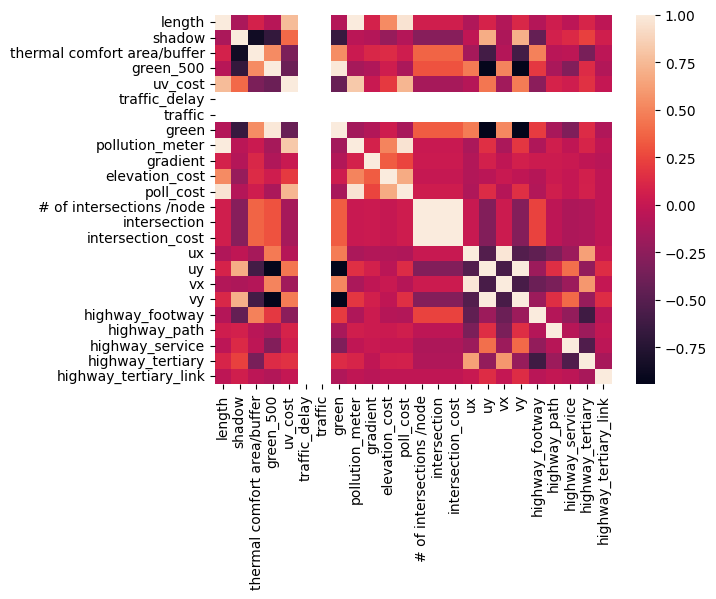

In [97]:
sns.heatmap(df.corr())
plt.show()

In [98]:
model = Sequential([
    Dense(units = 25, activation = 'relu'),
    Dense(units = 10, activation = 'relu'),
    Dense(units = 1, activation = 'relu')
])

In [99]:
x_train, x_test, y_train, y_test = train_test_split(df[['ux', 'uy', 'vx', 'vy']], df[['uv_cost']], test_size=0.1)

In [100]:
model.compile(loss = 'mape', optimizer='adam')

In [103]:
model.fit(x_train, y_train, batch_size= 39, epochs= 100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 82.0513
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 82.0513
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 82.0513
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 82.0513
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 82.0513
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 82.0513
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 82.0513
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 82.0513
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 82.0513
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 82.0513
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss: 82.0513
Epoch 12/100
2/2 [==============================] - 0s 8ms/step - loss: 82.0513
Epoch 13/100
2/2 [==============================]

In [115]:
predicted = model.predict(x_test)
predicted

1/1 [==============================] - 0s 27ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

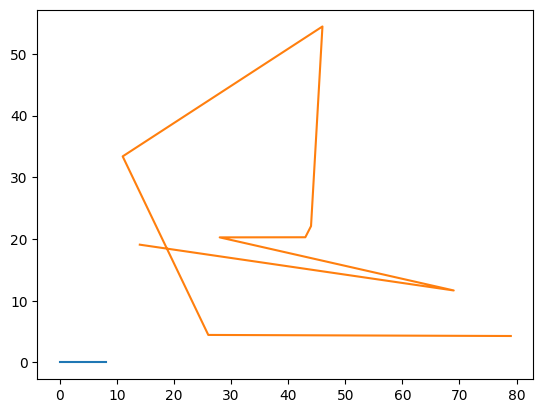

In [116]:
plt.plot(predicted)
plt.plot(y_test)